In [3]:
import geopandas as gpd

## Getting data from geopandas
Usually we will work with files of *GeoJson*(.geojson) or *Shapefile*(.shp) formats.

In [4]:
path_to_data = gpd.datasets.get_path('nybb')

In [5]:
gdf = gpd.read_file(path_to_data)

In [6]:
gdf

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


We can easily measure the `area` of our geometry points

In [8]:
gdf = gdf.set_index("BoroName")

In [12]:
gdf['geometry'].area

BoroName
Staten Island    1.623822e+09
Queens           3.045214e+09
Brooklyn         1.937478e+09
Manhattan        6.364712e+08
Bronx            1.186926e+09
dtype: float64

We can also evaluate the perimeter

In [14]:
gdf['boundary'] = gdf.boundary

We can use the centroid point of a given polygon

In [15]:
gdf['centroid'] = gdf.centroid

## This is all good so we can evalute distances!
For instance let's evaluate the distances of the polygons to one given centroid 

In [18]:
queens_point = gdf['centroid'].iloc[1]

In [19]:
gdf['distance'] = gdf['centroid'].distance(queens_point)

Then we can dtermine what are the average, max and minimal distances to that point

In [20]:
gdf['distance'].mean()

49841.727323648636

In [21]:
gdf['distance'].min()

0.0

In [23]:
gdf['distance'].max()

103781.53527578666

Visualizing the area

<AxesSubplot:>

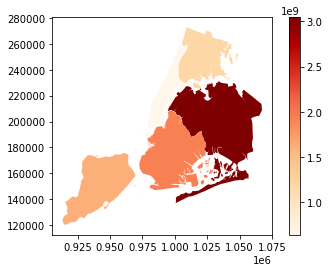

In [28]:
gdf['area'] = gdf.area
gdf.plot('area', legend=True, cmap='OrRd')

In the figure above we have every borough colored by it's area size

## Using more layers

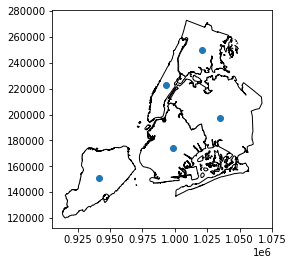

In [30]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
gdf.plot(ax=ax, color='white', edgecolor='black')
gdf['centroid'].plot(ax=ax)
plt.show()

## Geometry

### Buffer

Let's say New York is receiving presidents from around the world for a convention. In this situation we need to create no-drone-fly zones for safety.

How about we draw a buffer of ~5000 feet?

<AxesSubplot:>

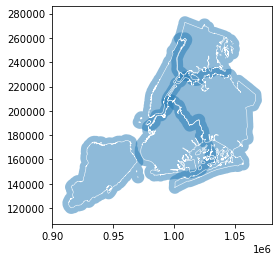

In [36]:
# Get the boundary of each area
gdf["boundary"] =  gdf.boundary

# buffering the active geometry by 10 000 feet (geometry is already in feet)
gdf["buffered"] = gdf.buffer(5000)

ax = gdf["buffered"].plot(alpha=.5)

gdf["boundary"].plot(ax=ax, color="white", linewidth=.5)

### Envelope

<AxesSubplot:>

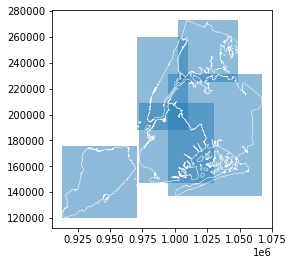

In [37]:
# Get the envelope of each area
gdf["enveloped"] = gdf.envelope

# plotting the smallest rectangle envelope around an area
ax = gdf["enveloped"].plot(alpha=.5)

gdf["boundary"].plot(ax=ax, color="white", linewidth=.5)